<a href="https://colab.research.google.com/github/Yying-Gis/yorkbestliving/blob/main/Traffic_convenience_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install osmnx
import osmnx as ox
!pip install networkx
import networkx as nx
!pip install matplotlib.pyplot
import matplotlib.pyplot as plt
#!pip install folium
#import folium
#!pip install keplergl
#from keplergl import KeplerGl
!pip install geopandas
import geopandas as gpd
#!pip install tqdm
#from tqdm import tqdm
!pip install pandas
import pandas as pd
!pip install RateLimiter
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 1.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    retu

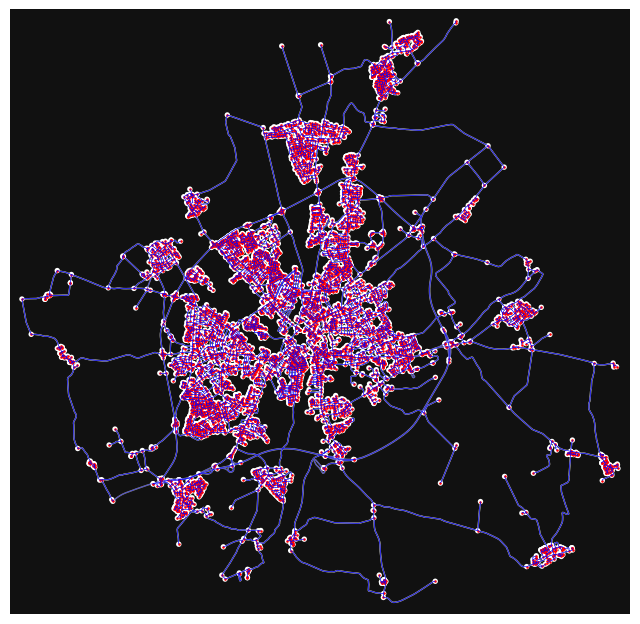

In [7]:
# drive
# osmnx.features.features_from_place(query, tags, *, which_result=None)
drive  = ox.graph_from_place("York, UK", network_type='drive')
#print(type(drive))
  #<class 'networkx.classes.multidigraph.MultiDiGraph'>
    #output (node, edge:include length, travel_time)
drive_projected = ox.project_graph(drive)
nodes_drive, edges_drive = ox.convert.graph_to_gdfs(drive_projected)

fig, ax = ox.plot_graph(drive_projected, show=False, close=False)
edges_drive.plot(ax=ax, linewidth=0.3, edgecolor='blue')
nodes_drive.plot(ax=ax, color='red', markersize=0.7)
plt.show()

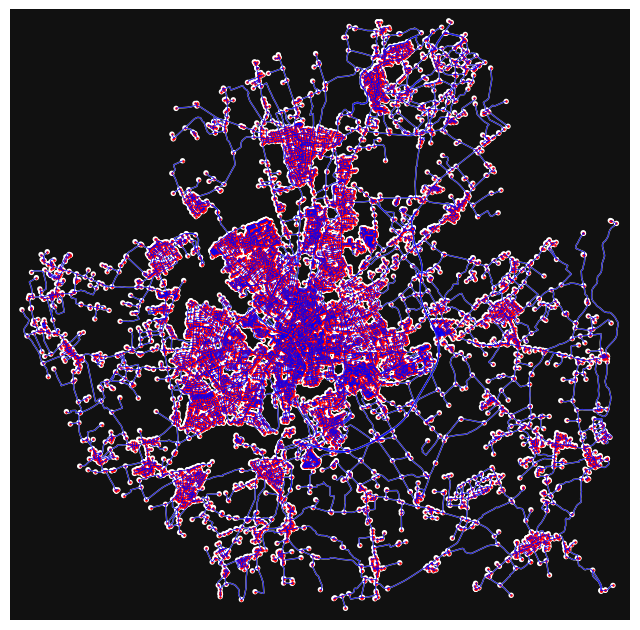

In [8]:
# add data (footstreet )
footstreets = gpd.read_file("/content/drive/MyDrive/UK_DATA/York/transportation_convenience/Footstreets.geojson")

# osmnx.graph.graph_from_place(query, *, network_type='all', simplify=True, retain_all=False, truncate_by_edge=False, which_result=None, custom_filter=None)
# get walking
walk = ox.graph_from_place("York, UK", network_type='walk')

#combine data
# ox.bearings.add_edge_bearings || return : networkx.MultiDiGraph
walk_net = ox.bearing.add_edge_bearings(ox.projection.project_graph(walk, to_crs=footstreets.crs))
walk_projected = ox.project_graph(walk_net)
nodes_walk, edges_walk = ox.convert.graph_to_gdfs(walk_projected)

fig, ax = ox.plot_graph(walk_projected, show=False, close=False)
edges_walk.plot(ax=ax, linewidth=0.3, edgecolor='blue')
nodes_walk.plot(ax=ax, color='red', markersize=0.7)
plt.show()


In [9]:
#get train
train_stations = ox.features_from_place("York, UK", tags={'railway':'station'})
stations_gdf = ox.projection.project_gdf(train_stations.to_crs(walk_projected.graph['crs']))
#print(type(stations_gdf))
  #'geopandas.geodataframe.GeoDataFrame'>
stations_gdf

geometry internet_access  \
element id                                                           
node    3715250496    POINT (621434.5 5982434.105)              no   
        5011575299  POINT (624783.366 5980722.094)             NaN   
        5758644802   POINT (625074.67 5980498.422)            wlan   
        6812085805   POINT (630569.923 5981235.13)             NaN   

                           name naptan:AtcoCode        network  \
element id                                                       
node    3715250496    Poppleton     9100POPLTON  National Rail   
        5011575299          NaN             NaN            NaN   
        5758644802         York        9100YORK  National Rail   
        6812085805  Murton Park             NaN            NaN   

                                                 network:website  \
element id                                                         
node    3715250496  https://www.nationalrail.co.uk/stations/pop/   
        5011575299                                           NaN   
        5758644802  https://www.nationalrail.co.uk/stations/yrk/   
        6812085805                                           NaN   

                   network:wikidata                      operator  \
element id                                                          
node    3715250496           Q26334               Northern Trains   
        5011575299              NaN                           NaN   
        5758644802           Q26334  London North Eastern Railway   
        6812085805              NaN  Derwent Valley Light Railway   

                                                     operator:website  \
element id                                                              
node    3715250496  https://www.northernrailway.co.uk/stations/pop...   
        5011575299                                                NaN   
        5758644802                                                NaN   
        6812085805                                                NaN   

                   operator:wikidata  ...  wikidata  \
element id                            ...             
node    3715250496         Q85789775  ...  Q7229551   
        5011575299               NaN  ...       NaN   
        5758644802               NaN  ...  Q2269429   
        6812085805               NaN  ...       NaN   

                                       wikipedia    usage addr:city  \
element id                                                            
node    3715250496  en:Poppleton railway station      NaN       NaN   
        5011575299                           NaN  tourism       NaN   
        5758644802       en:York railway station      NaN      York   
        6812085805                           NaN  tourism       NaN   

                          addr:housename addr:postcode   addr:street  \
element id                                                             
node    3715250496                   NaN           NaN           NaN   
        5011575299                   NaN           NaN           NaN   
        5758644802  York Railway Station      YO24 1AB  Station Road   
        6812085805                   NaN           NaN           NaN   

                   internet_access:fee listed_status passenger  
element id                                                      
node    3715250496                 NaN           NaN       NaN  
        5011575299                 NaN           NaN       NaN  
        5758644802                  no     Grade II*       yes  
        6812085805                 NaN           NaN       NaN  

[4 rows x 27 columns]